<a href="https://colab.research.google.com/github/Abhishek416/Darkent_traffic_classification/blob/main/Darknet_Traffic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp '/content/drive/My Drive/darknet_traffic.csv' '/content/'

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import Adam
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from keras.metrics import Precision
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.optimizers import Adam


In [4]:
data=pd.read_csv('darknet_traffic.csv')
data

,hour,src_ip_3gram,dst_ip_3gram,Src Port,Dst Port,Total Length of Fwd Packet,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Std,Idle Min,Label,Label.1
0,4,12,2204,57158,443,-0.034644,-0.498852,-0.379416,-0.409393,-0.336071,...,-0.061219,0.589647,0,0,0,0,0.000000e+00,0.000000e+00,0,0
1,4,12,2204,57159,443,-0.034644,-0.498852,-0.379416,-0.409393,-0.336071,...,-0.061219,0.589647,0,0,0,0,0.000000e+00,0.000000e+00,0,0
2,4,12,2204,57160,443,-0.034644,-0.498852,-0.379416,-0.409393,-0.336071,...,-0.061219,0.589647,0,0,0,0,0.000000e+00,0.000000e+00,0,0
3,4,12,3974,49134,443,-0.034644,-0.498852,-0.379416,-0.409393,-0.336071,...,-0.061219,0.589647,0,0,0,0,0.000000e+00,0.000000e+00,0,0
4,4,12,971,34697,19305,-0.014801,-0.498852,-0.247304,-0.409393,-0.094691,...,0.305786,0.589647,0,0,0,0,3.117718e+06,1.437765e+15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141476,1,14,2259,55219,5355,-0.034631,0.203661,-0.379416,-0.409393,-0.336071,...,-0.060588,-1.097763,0,0,0,0,0.000000e+00,0.000000e+00,1,6
141477,2,14,2259,64207,5355,-0.034631,0.203661,-0.379416,-0.409393,-0.336071,...,-0.060588,-1.097763,0,0,0,0,0.000000e+00,0.000000e+00,1,6
141478,2,14,2259,61115,5355,-0.034631,0.203661,-0.379416,-0.409393,-0.336071,...,-0.060588,-1.097763,0,0,0,0,0.000000e+00,0.000000e+00,1,6
141479,2,14,2259,64790,5355,-0.034631,0.203661,-0.379416,-0.409393,-0.336071,...,-0.060588,-1.097763,0,0,0,0,0.000000e+00,0.000000e+00,1,6


In [5]:
data['Label'].value_counts()

0    117170
1     24311
Name: Label, dtype: int64

In [6]:
class_distribution = data[['Label','Label.1']].value_counts()
print(class_distribution)

Label  Label.1
0      5          48300
       1          32545
1      0          13284
0      4           8563
       7           8402
       2           6932
       3           5561
       0           4766
1      2           4541
       4           2610
0      6           2101
1      6           1465
       7           1346
       3            582
       1            263
       5            220
dtype: int64


In [7]:
X = data.drop(columns=['Label'])
y=data['Label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape

(113184, 57)

#ML Models
Random Forest
XGBoost
Adaboost

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=180, criterion="entropy", random_state=0)

rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, rf_predictions)

precision = precision_score(y_test, rf_predictions)

recall = recall_score(y_test, rf_predictions)

f1 = f1_score(y_test, rf_predictions)

# Output the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9993638901650351
Precision: 1.0
Recall: 0.996319018404908
F1-Score: 0.9981561155500922


In [12]:
from sklearn.tree import export_text

# Access the first decision tree (replace with the index of the tree you want to visualize)
tree = rf_classifier.estimators_[0]

# Visualize the tree
tree_rules = export_text(tree, feature_names=list(X_train.columns))
print(tree_rules)

|--- Average Packet Size <= -0.02
|   |--- Flow IAT Min <= -0.09
|   |   |--- FWD Init Win Bytes <= -0.44
|   |   |   |--- Packet Length Min <= 0.30
|   |   |   |   |--- Bwd Packet Length Min <= -0.38
|   |   |   |   |   |--- Average Packet Size <= -0.55
|   |   |   |   |   |   |--- Idle Min <= 1427981868204032.00
|   |   |   |   |   |   |   |--- Dst Port <= 261.50
|   |   |   |   |   |   |   |   |--- Bwd IAT Total <= 1.36
|   |   |   |   |   |   |   |   |   |--- FWD Init Win Bytes <= -0.51
|   |   |   |   |   |   |   |   |   |   |--- Fwd Packets/s <= 0.18
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |   |--- Fwd Packets/s >  0.18
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- FWD Init Win Bytes >  -0.51
|   |   |   |   |   |   |   |   |   |   |--- src_ip_3gram <= 182.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   

Feature Importances:
src_ip_3gram: 0.23370897772776894
Label.1: 0.07685431664845058
Bwd Packet Length Min: 0.054913883488422494
Flow Bytes/s: 0.04838336933484775
FWD Init Win Bytes: 0.046868527664609694
Fwd Seg Size Min: 0.04559580170318946
Idle Min: 0.04034039154519998
Subflow Bwd Bytes: 0.03870745419780548
hour: 0.03480545634610497
Bwd Packets/s: 0.03421466294375813
Flow IAT Min: 0.03387642337455502
dst_ip_3gram: 0.0327884242494862
Bwd Init Win Bytes: 0.030979026799528468
Average Packet Size: 0.029402366749604517
Fwd Packets/s: 0.02713521718528739
Dst Port: 0.022589845016703924
Packet Length Max: 0.021256217080161906
Packet Length Variance: 0.020081574978857063
Fwd Packet Length Min: 0.015464005136038378
Packet Length Min: 0.013374511510406598
Total Length of Fwd Packet: 0.010902171951806107
Fwd IAT Min: 0.008067860260799356
Src Port: 0.007988618051624251
Subflow Fwd Bytes: 0.007072036056262953
Idle Std: 0.0064134368662318985
Fwd Act Data Pkts: 0.005386071345941741
Fwd IAT Std: 0.005

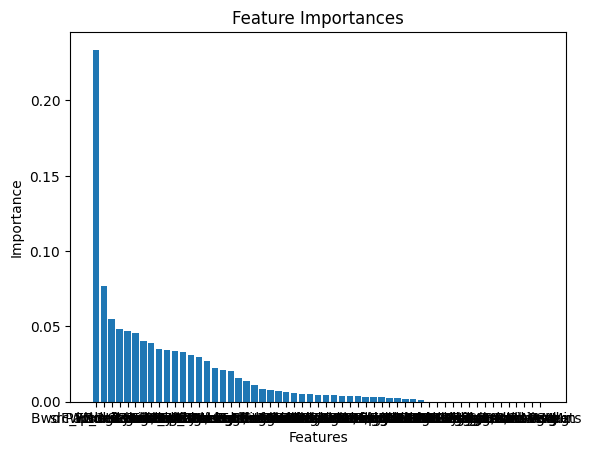

In [13]:
feature_names = X.columns.tolist()

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Pair features with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or plot feature importances
print("Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

# Plot bar chart
plt.bar(*zip(*sorted_features))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

#Adaboost

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an AdaBoost classifier with a decision tree estimator
ab_classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=150,
    random_state=0
)

# Train the classifier on your training data
ab_classifier.fit(X_train, y_train)

# Make predictions
ab_predictions = ab_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [15]:
accuracy = accuracy_score(y_test, ab_predictions)

precision = precision_score(y_test, ab_predictions)

recall = recall_score(y_test, ab_predictions)

f1 = f1_score(y_test, ab_predictions)

# Output the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9996112662119659
Precision: 0.9997951239500102
Recall: 0.9979550102249489
F1-Score: 0.998874219629516


In [16]:
# Access the individual decision trees (base estimators)
decision_trees = ab_classifier.estimators_

# Visualize or analyze each decision tree
for i, tree in enumerate(decision_trees):
    print(f"Decision Tree {i + 1}:")
    tree_rules = export_text(tree, feature_names=list(X_train.columns))
    print(tree_rules)
    print("=" * 50)

Decision Tree 1:
|--- Bwd Packet Length Min <= 0.56
|   |--- Fwd Seg Size Min <= 2.00
|   |   |--- Bwd Init Win Bytes <= 4.23
|   |   |   |--- class: 0
|   |   |--- Bwd Init Win Bytes >  4.23
|   |   |   |--- class: 1
|   |--- Fwd Seg Size Min >  2.00
|   |   |--- src_ip_3gram <= 183.00
|   |   |   |--- class: 1
|   |   |--- src_ip_3gram >  183.00
|   |   |   |--- class: 0
|--- Bwd Packet Length Min >  0.56
|   |--- src_ip_3gram <= 185.50
|   |   |--- src_ip_3gram <= 12.50
|   |   |   |--- class: 0
|   |   |--- src_ip_3gram >  12.50
|   |   |   |--- class: 1
|   |--- src_ip_3gram >  185.50
|   |   |--- Label.1 <= 5.00
|   |   |   |--- class: 0
|   |   |--- Label.1 >  5.00
|   |   |   |--- class: 0

Decision Tree 2:
|--- src_ip_3gram <= 12.50
|   |--- FWD Init Win Bytes <= 6.07
|   |   |--- FWD Init Win Bytes <= 3.19
|   |   |   |--- class: 0
|   |   |--- FWD Init Win Bytes >  3.19
|   |   |   |--- class: 0
|   |--- FWD Init Win Bytes >  6.07
|   |   |--- Dst Port <= 24510.50
|   |   | 

Feature Importances:
Src Port: 0.1171225874739105
Flow IAT Min: 0.1134161250196383
Fwd Packets/s: 0.07383579811077015
Bwd Packets/s: 0.0694102221674864
Label.1: 0.06654166932001476
src_ip_3gram: 0.05886915377554147
FWD Init Win Bytes: 0.058684573268058184
hour: 0.05461049720735415
Flow Bytes/s: 0.05290532215842192
dst_ip_3gram: 0.04483782905945318
Bwd Init Win Bytes: 0.03684344125802627
Idle Min: 0.03209373701388877
Packet Length Variance: 0.028652579900144352
Bwd Packet Length Min: 0.02521923490166531
Total Length of Fwd Packet: 0.024882808211128406
Dst Port: 0.02326285437391338
Average Packet Size: 0.018779195899837287
Packet Length Min: 0.015068899354274565
Subflow Bwd Bytes: 0.013248904029757038
Packet Length Max: 0.011881273544978286
Fwd IAT Min: 0.009948794053977429
Fwd Seg Size Min: 0.008435908094587687
Fwd Packet Length Min: 0.00719627730728438
Subflow Fwd Bytes: 0.006528947773294235
Idle Std: 0.005190554236326871
Fwd IAT Std: 0.0043901885298150665
Bwd IAT Max: 0.00356623111494

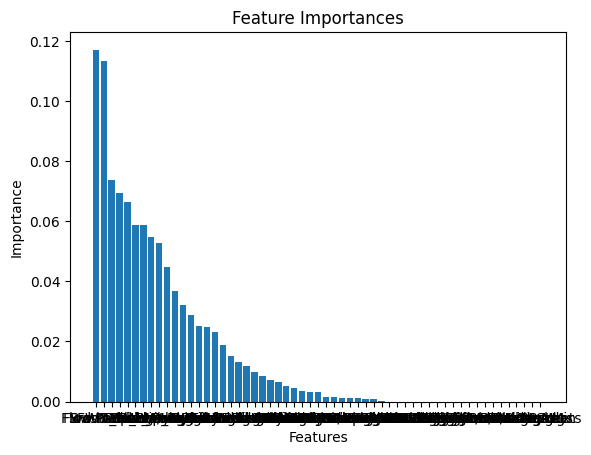

In [17]:
feature_names = X.columns.tolist()

# Get feature importances
feature_importances = ab_classifier.feature_importances_

# Pair features with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or plot feature importances
print("Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

# Plot bar chart
plt.bar(*zip(*sorted_features))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [18]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, xgb_predictions)

precision = precision_score(y_test, xgb_predictions)

recall = recall_score(y_test, xgb_predictions)

f1 = f1_score(y_test, xgb_predictions)

# Output the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9998233028236209
Precision: 1.0
Recall: 0.9989775051124744
F1-Score: 0.9994884910485933


In [20]:
print(xgb_model.n_estimators)

None


Feature Importances:
Bwd Packet Length Min: 0.38860175013542175
src_ip_3gram: 0.23456121981143951
Fwd Seg Size Min: 0.11445141583681107
Subflow Fwd Packets: 0.06053481251001358
RST Flag Count: 0.05758627876639366
Bwd Init Win Bytes: 0.02861594408750534
FWD Init Win Bytes: 0.021476546302437782
hour: 0.020189767703413963
dst_ip_3gram: 0.016902759671211243
Label.1: 0.012272126972675323
Idle Min: 0.011299369856715202
Fwd PSH Flags: 0.009566686116158962
Flow IAT Min: 0.002080570673570037
Fwd Packet Length Std: 0.0018859097035601735
Packet Length Max: 0.0018457249971106648
Total Length of Fwd Packet: 0.0016936537576839328
Fwd Act Data Pkts: 0.0015028923517093062
Dst Port: 0.0014146757312119007
PSH Flag Count: 0.0013854874996468425
Average Packet Size: 0.001034299610182643
Subflow Bwd Bytes: 0.0010236446978524327
Idle Std: 0.0009824212174862623
Src Port: 0.0009797229431569576
SYN Flag Count: 0.0009184184018522501
FIN Flag Count: 0.000916853197850287
Bwd Packets/s: 0.0008015138446353376
Fwd Pa

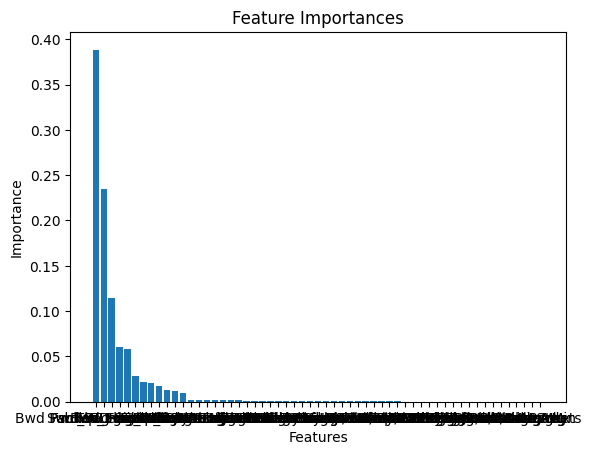

In [21]:
feature_names = X.columns.tolist()


# Get feature importances
feature_importances = xgb_model.feature_importances_

# Pair features with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or plot feature importances
print("Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

# Plot bar chart
plt.bar(*zip(*sorted_features))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

#Deep Learning models
CNN+BiLSTM

In [22]:
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                7950      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 8001 (31.25 KB)
Trainable params: 8001 (31.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
X_train_gru = X_train_gru.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_gru = X_test_gru.reshape((X_test.shape[0], X_test.shape[1], 1))

In [35]:
model.fit(X_train_gru, y_train, epochs=10, batch_size=32, validation_data=(X_test_gru, y_test))


Epoch 1/10
3537/3537 [==============================] - 87s 25ms/step - loss: 74489280.0000 - accuracy: 0.8852 - val_loss: 5.0624 - val_accuracy: 0.9177
Epoch 2/10
3537/3537 [==============================] - 84s 24ms/step - loss: 7.9580 - accuracy: 0.8923 - val_loss: 1.1243 - val_accuracy: 0.9144
Epoch 3/10
3537/3537 [==============================] - 85s 24ms/step - loss: 2.6775 - accuracy: 0.9021 - val_loss: 0.2908 - val_accuracy: 0.9171
Epoch 4/10
3537/3537 [==============================] - 80s 23ms/step - loss: 1985744768.0000 - accuracy: 0.8674 - val_loss: 2717366.2500 - val_accuracy: 0.8791
Epoch 5/10
3537/3537 [==============================] - 80s 23ms/step - loss: 209980.4219 - accuracy: 0.8865 - val_loss: 0.2733 - val_accuracy: 0.9202
Epoch 6/10
3537/3537 [==============================] - 81s 23ms/step - loss: 0.5087 - accuracy: 0.8977 - val_loss: 0.3572 - val_accuracy: 0.8908
Epoch 7/10
3537/3537 [==============================] - 80s 23ms/step - loss: 0.2668 - accuracy: 

In [36]:
y_pred = model.predict(X_test_gru)
y_pred = np.round(y_pred)

885/885 [==============================] - 7s 7ms/step


In [37]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9427501148531646
Precision: 0.9698275862068966
Recall: 0.6901840490797546
F1 Score: 0.8064516129032258
